In [1]:
!pip install geopandas matplotlib rasterio geemap leafmap torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 121.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 629.4/629.4 kB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.5/20.5 MB 115.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 116.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 86.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 88.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.7/207.7 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.8 MB/s eta 0:00:00
  Attempting uninstall: duckdb
    Found existing installation: duckdb 1.3.2
    Uninstalling duckdb-1.3.2:
      Successfully unins

In [2]:
import os
import glob
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
import geemap
import leafmap
import warnings

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
DRIVE_BASE_PATH = '/content/drive/My Drive/'

In [5]:
PROVIDED_DATA_PATH = os.path.join(DRIVE_BASE_PATH, 'Riya_Soni_SelectionTask/Provided_Data/')

In [6]:
NCR_SHAPEFILE_PATH = os.path.join(PROVIDED_DATA_PATH, 'delhi_ncr_region.geojson') # NCR Shapefile
AIRSHED_SHAPEFILE_PATH = os.path.join(PROVIDED_DATA_PATH, 'delhi_airshed.geojson') # Airshed Shapefile
TILES_FOLDER_PATH = os.path.join(DRIVE_BASE_PATH, 'GEE_Delhi_Airshed_Tiles/') # Path to the downloaded dataset- 4,608 GEE tiles
LAND_COVER_PATH = os.path.join(PROVIDED_DATA_PATH, 'worldcover_bbox_delhi_ncr_2021.tif') # Land Cover TIF (Q2)

In [7]:
PROJECT_FOLDER_PATH = os.path.join(DRIVE_BASE_PATH, 'Riya_Soni_SelectionTask/')

**Q1. Spatial Reasoning & Data Download [5 Marks]**

1.   Plot the Delhi-NCR shapefile using matplotlib (0.25).
2.   Overlay this grid (Delhi Airshed) on a satellite basemap using geemap or leafmap (1.0 mark).
3. Your task is to download only the Delhi airshed imagery from Sentinel-2 (Surface Reflectance preferred, timestamp: January 2025 - RGB). Each downloaded tile should be 1280 m × 1280 m, and the file name should correspond to the tile’s center coordinates. Use Google Earth Engine for downloading. The final deliverable will be a folder link containing sample downloaded images. (2.25)



1.   To confirm successful download of all tiles, you must provide visual plots and the total count of downloaded images.(0.50)
2.   Sentinel 2 is not cloud preproprocess you have to take less cloud imagery of the month. (0.25)
6. When downloading satellite imagery, what important parameters should you consider and why?


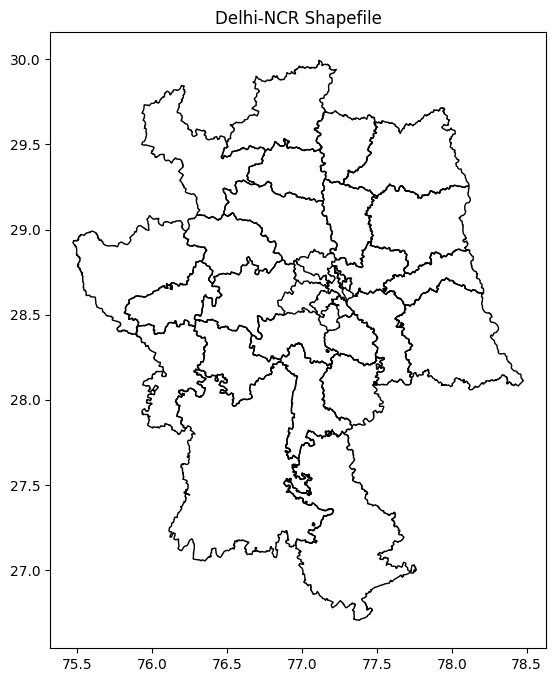

In [8]:
# 1. Plot the Delhi-NCR shapefile using matplotlib (0.25).

delhi_ncr = gpd.read_file(NCR_SHAPEFILE_PATH)
fig, ax = plt.subplots(figsize=(8, 8))
delhi_ncr.plot(ax=ax, edgecolor="black", facecolor="none", linewidth=1)
plt.title("Delhi-NCR Shapefile")
plt.show()

In [9]:
# 2. Overlay this grid (Delhi Airshed) on a satellite basemap using geemap or leafmap (1.0 mark).

# Load airshed grid
airshed = gpd.read_file(AIRSHED_SHAPEFILE_PATH)

# Create map centered on Delhi
m = leafmap.Map(center=[28.6, 77.2], zoom=10)
m.add_basemap("SATELLITE")  # Add a satellite basemap

# Add Delhi-NCR boundary
m.add_gdf(
    delhi_ncr,
    layer_name="Delhi-NCR Region",
    style={"color": "black", "fillColor": "none"},
    zoom_to_layer=False
)

# Add airshed grid
m.add_gdf(
    airshed,
    layer_name="Delhi Airshed Grid",
    style={"color": "red", "fillColor": "none"}
)

m


Map(center=[28.6, 77.2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out…

In [10]:
# (No need to rerun this cell as the file "delhi_airshed_overlay.html" is already saved once)

# To download the map in drive as it won't be visible in the output of the above cell, this file is uploaded within this repository as "delhi_airshed_overlay.html"
map_file_path = os.path.join(DRIVE_BASE_PATH, 'Riya_Soni_SelectionTask/delhi_airshed_overlay.html')
m.to_html(map_file_path)

In [11]:
# 3. Your task is to download only the Delhi airshed imagery from Sentinel-2 (Surface Reflectance preferred, timestamp: January 2025 - RGB).
#    Each downloaded tile should be 1280 m × 1280 m, and the file name should correspond to the tile’s center coordinates.
#    Use Google Earth Engine for downloading. The final deliverable will be a folder link containing sample downloaded images. (2.25)

# 5. Sentinel 2 is not cloud preproprocess you have to take less cloud imagery of the month. (0.25) --> it was already taken care while downloading the dataset



### Data Download Process (Google Earth Engine)

The dataset is downloaded using the **Google Earth Engine (GEE) Web UI**.

The process ensures:
* **Data:** COPERNICUS/S2_SR_HARMONIZED (Sentinel-2, **Surface Reflectance**)
* **Region:** The "delhi_airshed.geojson" file (uploaded as asset) and used as the "roi" (region of interest).
* **Date:** ".filterDate('2025-01-01', '2025-01-31')" (**Timestamp: January 2025**)
* **Clouds:** ".filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 10))" and ".median()" were used to create a single, **low-cloud composite image**. ---> this satisfies the 5th part of Q1
* **Format:** The image was converted to **RGB** using ".visualize({bands: ['B4', 'B3', 'B2'], min: 0, max: 2500, gamma: 1.1})" (B4- Red, B3- Green, B2- Blue).
* **Tiling:** The export used "scale: 10", "crs: 'EPSG:32644'", and "fileDimensions: [128, 128]" to create **1280m x 1280m** tiles (128 pixels * 10m/pixel).

#### Final GEE Script

Link- https://code.earthengine.google.com/2e82a5c0dee27d6c699c7c31f38e76ba




Confirming Downloaded Tiles....
Total count of image tiles in the folder is: 4608
(This matches the 4,608 files reported from the GEE export.)

Plotting a few sample tiles:


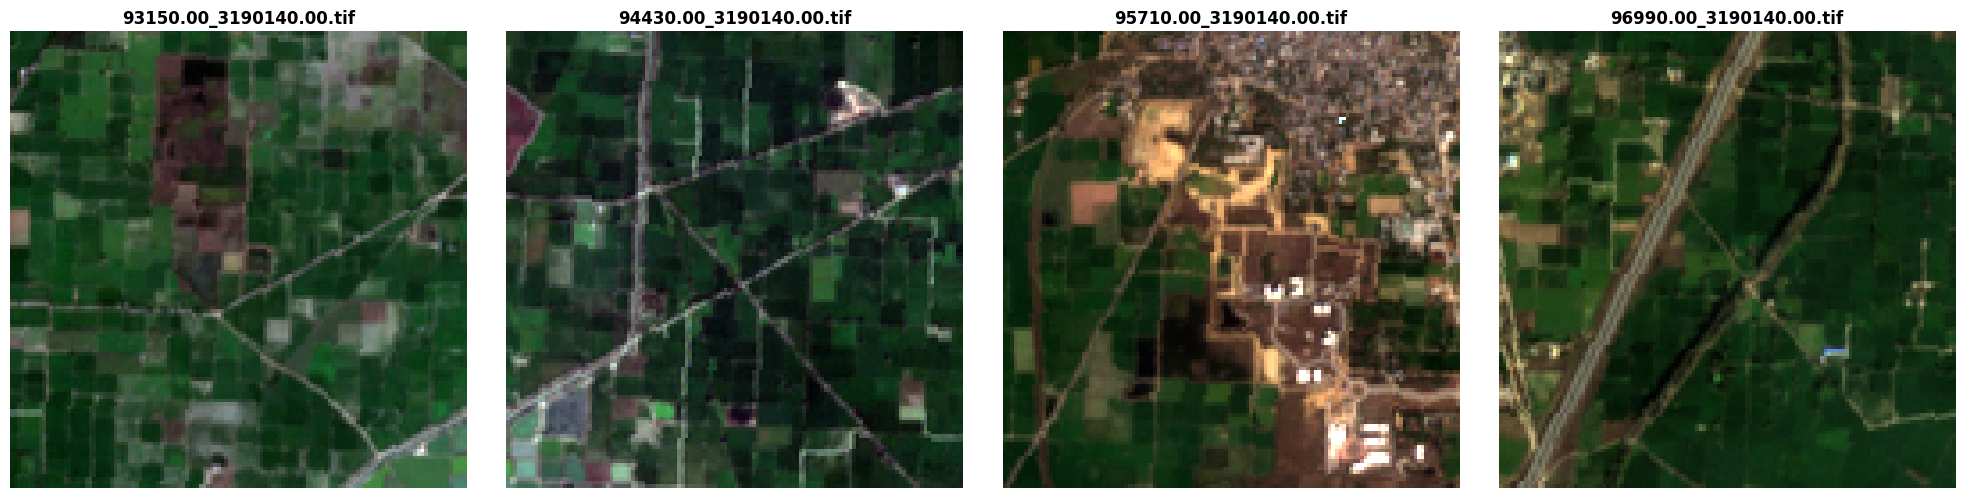

In [12]:
# 4. To confirm successful download of all tiles, you must provide visual plots and the total count of downloaded images.(0.50)

print("Confirming Downloaded Tiles....")

tif_files = glob.glob(os.path.join(TILES_FOLDER_PATH, '*.tif')) # path to all files ending in .tif

total_count = len(tif_files)
print("Total count of image tiles in the folder is:", total_count)
if total_count == 4608:
    print("(This matches the 4,608 files reported from the GEE export.)")
else:
    print(f"(Note: You reported 4608 files, but {total_count} were found in the folder.)")


print("\nPlotting a few sample tiles:")

plot_files = tif_files[:4] # first 4 images

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, file_path in enumerate(plot_files):
    with rasterio.open(file_path) as src:
        # The 'show' function from rasterio.plot handles RGB plotting
        # It reads the first 3 bands automatically
        show(src, ax=axes[i], title=os.path.basename(file_path), adjust='linear')
        axes[i].axis('off')


plt.tight_layout()
plt.show()

In [13]:
# (No need to rerun this cell as the names are updated as per the requirement)

# Renaming files to their center coordinates

original_name_prefix = 'Delhi_Airshed_RGB_Tiles' # default prefix GEE gave to all files

renamed_count = 0
skipped_count = 0


print(f"Checking {total_count} files. This may take a minute...")

for i, file_path in enumerate(tif_files):
    # Get just the filename
    file_name = os.path.basename(file_path)

    # Check if the file needs renaming
    if file_name.startswith(original_name_prefix):
        try:
            # Opening the file to read its metadata
            with rasterio.open(file_path) as src:
                # Get the bounds: (left, bottom, right, top)
                bounds = src.bounds

                # Calculate the center coordinates of images (in EPSG:32644)
                center_x = (bounds.left + bounds.right) / 2
                center_y = (bounds.bottom + bounds.top) / 2

            # Creating the new name
            # We round to 2 decimal places for a clean filename
            new_name = f"{center_x:.2f}_{center_y:.2f}.tif"
            new_path = os.path.join(TILES_FOLDER_PATH, new_name)

            # Renaming the file
            os.rename(file_path, new_path)
            renamed_count += 1

            # To print progress every 500 files
            if renamed_count % 500 == 0:
                print(f"   ...renamed {renamed_count} files...")

        except Exception as e:
            print(f"ERROR: Could not process {file_path}. Reason: {e}")

    else:
        # This file was already renamed, so we skip it
        skipped_count += 1

print("\n--- Renaming Complete ---")
print(f"Successfully renamed {renamed_count} files.")
print(f"Skipped {skipped_count} files (already renamed or invalid).")

Checking 4608 files. This may take a minute...

--- Renaming Complete ---
Successfully renamed 0 files.
Skipped 4608 files (already renamed or invalid).


In [14]:
# 6. When downloading satellite imagery, what important parameters should you consider and why?


#### 6. When downloading satellite imagery, what important parameters should you consider and why?

The important parameters I found important to be considered while downloading the satellite imagery for this assessment are as follows:

1.   **Region of Interest (ROI):** The precise geographic boundary of the study area. This is the most fundamental filter ('delhi_airshed.geojson' served as an exact shapefile for the dataset). An ROI focuses the search and processing, saving immense time and resources.

2.   **Date Range (Timestamp):** The start and end dates for the image search (January 1, 2025 to January 31, 2025). This is essential for getting data relevant to the analysis. It allows the study of a specific season, track changes over time (e.g., pre/post-monsoon), or find the most recent cloud-free image. In view of this problem statement January proves to be the perfect month for this analysis because it provides the clearest possible view of the land. As January in Northern India is post-monsoon winter, so there is minimal cloud cover or smog. This timing is also ideal as the winter (Rabi) crops are in full bloom, making agricultural fields vibrantly green. This creates a clear visual contrast between 'Cropland', 'Built-up' (grey) areas, and 'Bare soil' (brown). These observation making it much easier for the AI model to accurately identify different land use patterns.

3.   **Cloud Cover:** The maximum percentage of an image that can be obscured by clouds (< 10%). For optical satellites like Sentinel-2, the data is not cloud-processed, so clouds block the view of the ground. In scenarios like these filtering for low cloud cover is essential to get usable data. Using a .median() composite, is an advanced way to handle this by finding the middle pixel value, which effectively ignores cloud (high value) and shadow (low value) outliers.

4.   **Data Product (Processing Level):** The level of correction applied to the image. The most common are Top-of-Atmosphere (TOA) (raw data) or Surface Reflectance (SR) (atmospherically corrected). Surface Reflectance (S2_SR) is preferred for analyzing surface features and for applications like vegetation indexing. It has been "cleaned" of atmospheric haze and other effects, providing the "true" color of the ground. This makes it possible to compare images from different times or places accurately.

5.   **Coordinate Reference System (CRS) & Spatial Resolution (Scale):** The CRS is the map projection used to represent the 3D Earth on a 2D map (e.g., EPSG:32644, EPSG:4326). The Scale is the size of one pixel on the ground (e.g., 10m). These two must be chosen together. The task required a grid of 1280 meters. If the default Geographic CRS (EPSG:4326) were chosen, the units would be in degrees, not meters and 1280 "degrees" is meaningless also not a uniform unit of distance. So, a meter-based CRS (EPSG:32644) is choosen so that the units remain in meters. This allowed combining the scale: 10 (10m/pixel) with fileDimensions: [128, 128] (128 pixels) to create a tile that was computably and verifiably 1280 meters wide, resulting in 128-pixel tiles that were actually 1280m x 1280m on the ground.

6.   **Spectral Bands:** The specific "colors" or parts of the electromagnetic spectrum to download. As the task required a visual image, RGB (Red, Green, Blue) bands (B4, B3, B2) were selected. For a different analysis, like vegetation health, the Near-Infrared (NIR) band would be included.





Q2. Label Construction & Dataset Preparation [10 Marks]



1.   For each image, extract a 128×128 patch from the land_cover.tif centered at the image's coordinate (2 marks)
2.   Assign a label using the mode (most frequent) land cover class in the patch (2 marks)
3.   Map ESA class codes to 11 standardized labels (1 mark)
4.   Handle edge cases and discuss treatment of no-data pixels or mixed class dominance (2 marks)
5.   Perform a 60/40 train-test split randomly (1 mark)
6.   Visualize class distribution and discuss balance (or imbalance) (2 marks)









In [15]:
# 1. For each image, extract a 128×128 patch from the land_cover.tif centered at the image's coordinate (2 marks)


In [16]:
# (No need to rerun this cell as the new reprojected file is already saved)

# Reprojecting the "worldcover_bbox_delhi_ncr_2021.tif" (Land Cover TIF) from CRS: 'EPSG:4326' to CRS: 'EPSG:32644'
print("Reprojecting Land Cover File")
print("This may take a minute...")

from rasterio.warp import calculate_default_transform, reproject, Resampling

TARGET_CRS = 'EPSG:32644'

# Path for the new reprojected file
LAND_COVER_REPROJECTED_PATH = os.path.join(PROVIDED_DATA_PATH, 'land_cover_32644.tif')

try:
    # Opening the original land cover file
    with rasterio.open(LAND_COVER_PATH) as src:
        # Calculating the transform, width, and height for the new CRS
        transform, width, height = calculate_default_transform(
            src.crs, TARGET_CRS, src.width, src.height, *src.bounds,
            dst_resolution=10  # Ensuring 10m resolution
        )

        # Copy the metadata and update it for the new file
        kwargs = src.meta.copy()
        kwargs.update({
            'crs': TARGET_CRS,
            'transform': transform,
            'width': width,
            'height': height
        })

        # Opening the new file and write the reprojected data
        with rasterio.open(LAND_COVER_REPROJECTED_PATH, 'w', **kwargs) as dst:
            reproject(
                source=rasterio.band(src, 1),
                destination=rasterio.band(dst, 1),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=TARGET_CRS,

                # Use of 'nearest' for categorical land cover data prevents averaging class codes (e.g. 10+50 = 30)
                resampling=Resampling.nearest
            )

    print(f"\nReprojected file is saved to:")
    print(LAND_COVER_REPROJECTED_PATH)

except Exception as e:
    print(f"An error occurred: {e}")

Reprojecting Land Cover File
This may take a minute...

Reprojected file is saved to:
/content/drive/My Drive/Riya_Soni_SelectionTask/Provided_Data/land_cover_32644.tif


In [17]:
# Path for the new reprojected file
LAND_COVER_REPROJECTED_PATH = os.path.join(PROVIDED_DATA_PATH, 'land_cover_32644.tif')

In [18]:
# 1. For each image, extract a 128×128 patch from the land_cover.tif centered at the image's coordinate (2 marks)
# 2. Assign a label using the mode (most frequent) land cover class in the patch (2 marks)
# 3. Map ESA class codes to 11 standardized labels (1 mark)
# 4.1. Handle edge cases
# 4.2. Discuss treatment of no-data pixels or mixed class dominance (2 marks)

In [19]:
# (No need to rerun this cell as the csv file is already saved)

# 1, 2, 3, 4.1: Extract Patches, Assign Mode, Map Labels, Handle Edge Cases
print("Starting 1 - 4.1: Generating Labeled Dataset")
print("This will take 5-10 minutes to process all 4,608 tiles...")

import pandas as pd
import numpy as np
from rasterio.windows import Window
from scipy.stats import mode as scipy_mode
from tqdm.notebook import tqdm # For a progress bar

# Defining the ESA WorldCover Class Mapping (for 3)
# (11 standardized labels)
ESA_CLASS_MAP = {
    10: "Tree cover",
    20: "Shrubland",
    30: "Grassland",
    40: "Cropland",
    50: "Built-up",
    60: "Bare / sparse vegetation",
    70: "Snow and Ice",
    80: "Permanent water bodies",
    90: "Herbaceous wetland",
    95: "Mangroves",
    100: "Moss and lichen",
    0: "No Data" # For "no-data" pixel value
}
# Creating the dataset that only includes the 11 valid classes
all_labels = {k: v for k, v in ESA_CLASS_MAP.items() if k != 0}


# List of all renamed image tiles
all_tif_files = glob.glob(os.path.join(TILES_FOLDER_PATH, '*_*.tif'))
print(f"Found {len(all_tif_files)} renamed image tiles to process.")

# Loop to Extract Patchs and Find Mode (for 1 & 2)
data = []
patch_size = 128 # 128x128 pixels

# Opening the main (REPROJECTED) land cover file once
with rasterio.open(LAND_COVER_REPROJECTED_PATH) as lc_src:

    # Use tqdm for a nice progress bar
    for file_path in tqdm(all_tif_files, desc="Processing Tiles"):
        file_name = os.path.basename(file_path)

        try:
            # Getting center coordinate from filename
            center_x_str, center_y_str = file_name.replace(".tif", "").split("_")
            center_x, center_y = float(center_x_str), float(center_y_str)

            # Converting map coordinate to pixel index (row, col)
            row, col = lc_src.index(center_x, center_y)

            # Calculating top-left corner for the 128x128 window
            top_left_row = row - (patch_size // 2)
            top_left_col = col - (patch_size // 2)

            # Defining window
            patch_window = Window(top_left_col, top_left_row, patch_size, patch_size)

            # Reading the 128x128 patch from the land cover file (for 1)
            patch = lc_src.read(1, window=patch_window)

            # Assigning label using the mode (for 2) & Handle Edge Cases (for 4.1)

            # First, flatten the 2D patch into a 1D array
            patch_flat = patch.flatten()

            # Second, filter out "No Data" pixels (value 0)
            valid_pixels = patch_flat[patch_flat != 0]

            label_code = 0 # Default to "No Data"

            # Handle "no-data" pixels (for 4.2)
            # If the patch is all "No Data" (valid_pixels is empty),
            # we will skip it entirely.
            if valid_pixels.size > 0:
                # Find the mode (most frequent value)
                mode_result = scipy_mode(valid_pixels, axis=None, keepdims=False)
                label_code = int(mode_result.mode) # Cast to a standard int

            # Only append if we found a valid label (not 0)
            if label_code != 0:
                data.append({
                    'filepath': file_path,
                    'label_code': label_code
                })

        except Exception as e:
            # 4.1: Handling edge cases
            # This catches tiles whose center is off the edge of the land cover map and silently skips them.
            pass

# Creating the Final Labeled DataFrame
label_df = pd.DataFrame(data)

# Map codes to human-readable names (for 3)
label_df['label_name'] = label_df['label_code'].map(all_labels)

# Saving the result to a CSV file
CSV_PATH = os.path.join(PROJECT_FOLDER_PATH, "labeled_dataset.csv")
label_df.to_csv(CSV_PATH, index=False)

print(f"\nGenerated labels for {len(label_df)} images.")
print(f"   (Skipped {len(all_tif_files) - len(label_df)} images that were 'No Data' or off-map edges)")
print(f"Dataset saved to: {CSV_PATH}")
print("\nFirst 5 rows of the dataset:")
display(label_df.head())

Starting 1 - 4.1: Generating Labeled Dataset
This will take 5-10 minutes to process all 4,608 tiles...
Found 4608 renamed image tiles to process.


Processing Tiles:   0%|          | 0/4608 [00:00<?, ?it/s]


Generated labels for 4384 images.
   (Skipped 224 images that were 'No Data' or off-map edges)
Dataset saved to: /content/drive/My Drive/Riya_Soni_SelectionTask/labeled_dataset.csv

First 5 rows of the dataset:


filepath  label_code label_name
0  /content/drive/My Drive/GEE_Delhi_Airshed_Tile...          40   Cropland
1  /content/drive/My Drive/GEE_Delhi_Airshed_Tile...          40   Cropland
2  /content/drive/My Drive/GEE_Delhi_Airshed_Tile...          40   Cropland
3  /content/drive/My Drive/GEE_Delhi_Airshed_Tile...          40   Cropland
4  /content/drive/My Drive/GEE_Delhi_Airshed_Tile...          40   Cropland

In [20]:
CSV_PATH = os.path.join(PROJECT_FOLDER_PATH, "labeled_dataset.csv") # Path to a CSV file

In [21]:
# Distinct labels in the labeled_dataset

distinct_labels = label_df['label_name'].value_counts()
display(distinct_labels)

label_name
Cropland                    2893
Built-up                    1034
Tree cover                   229
Shrubland                    136
Grassland                     82
Permanent water bodies         7
Bare / sparse vegetation       3
Name: count, dtype: int64

In [22]:
# 4.2. Discuss treatment of no-data pixels or mixed class dominance (2 marks)

#### 4.2: Discussion of Edge Case Treatment

The labeling script handled three main edge cases as required:

1.  **No-Data Pixels:** The ESA WorldCover data uses the value: **0** to represent "No Data". To handle this, all pixels with value `0` were filtered out of the 128x128 patch before calculating the mode. If a patch consisted entirely of "No Data" pixels (when the patch was outside the land cover map), it was skipped and not included in the final dataset.

2.  **Mixed Class Dominance:** It was handled using **mode** from **scipy.stats**. The function finds the single most frequent pixel value in a 128x128 patch, which is the "dominant class".


In [23]:
# 5. Perform a 60/40 train-test split randomly (1 mark)

from sklearn.model_selection import train_test_split

# Loading the dataset
full_dataset_df = pd.read_csv(CSV_PATH)

# 60/40 split (test_size=0.4)
# We use 'stratify' to ensure the class distribution is the same
# in both the train and test sets. This is crucial when dealing with imbalanced data.
train_df, test_df = train_test_split(
    full_dataset_df,
    test_size=0.4,
    random_state=42,  # For reproducibility
    stratify=full_dataset_df['label_code']
)

print(f"Total valid samples:   {len(full_dataset_df)}")
print(f"Training samples: {len(train_df)} (60%)")
print(f"Testing samples:  {len(test_df)} (40%)")

# Saving the splits for Q3 in the project folder
TRAIN_CSV_PATH = os.path.join(PROJECT_FOLDER_PATH, "train_dataset.csv")
TEST_CSV_PATH = os.path.join(PROJECT_FOLDER_PATH, "test_dataset.csv")

train_df.to_csv(TRAIN_CSV_PATH, index=False)
test_df.to_csv(TEST_CSV_PATH, index=False)
print(f"Train and test CSVs saved to: {PROJECT_FOLDER_PATH}")



Total valid samples:   4384
Training samples: 2630 (60%)
Testing samples:  1754 (40%)
Train and test CSVs saved to: /content/drive/My Drive/Riya_Soni_SelectionTask/


In [24]:
# 6. Visualize class distribution and discuss balance (or imbalance) (2 marks)

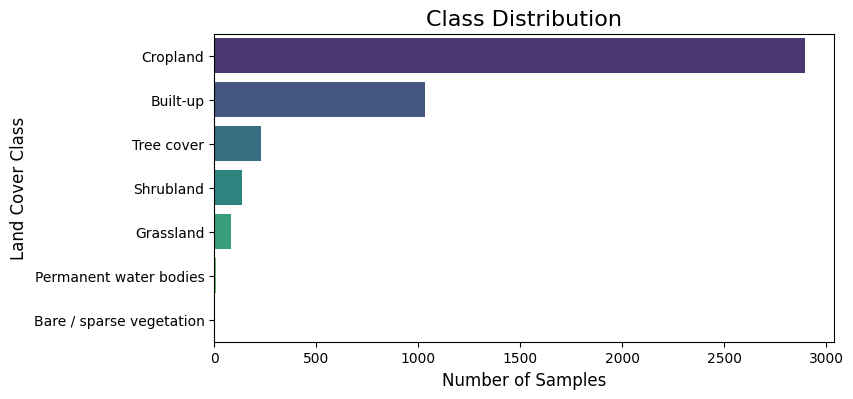

In [25]:
# 6.1: Visualize class distribution

import seaborn as sns

# Plotting the distribution
plt.figure(figsize=(8, 4))

# Getting the order of labels from most frequent to least
class_order = full_dataset_df['label_name'].value_counts().index

sns.countplot(
    data=full_dataset_df,
    y='label_name', # y-axis for long labels
    order=class_order,
    palette='viridis'
)

plt.title('Class Distribution', fontsize=16)
plt.xlabel('Number of Samples', fontsize=12)
plt.ylabel('Land Cover Class', fontsize=12)
plt.show()


In [26]:
# Distinct labels in the labeled_dataset

display(distinct_labels)

label_name
Cropland                    2893
Built-up                    1034
Tree cover                   229
Shrubland                    136
Grassland                     82
Permanent water bodies         7
Bare / sparse vegetation       3
Name: count, dtype: int64

### 6.2: Discussion of Class Balance (or Imbalance)

As the countplot above clearly shows, the **full dataset** is **highly imbalanced**.

1.  **Dominant Classes:** The "Cropland" (count = **2,893**) and "Built-up" (count = **1,034**) classes are the most dominant in the dataset. TIt was expected, as the Delhi Airshed region included a vast agricultural surrounding a densely populated urban area.

2.  **Common Classes:** The "Tree cover" (count = **229**), "Shrubland" (count = **136**), and "Grassland" (count = **82**) appear with moderate frequency.

3.  **Rare Classes:** "Permanent water bodies" (count = **7**) and "Bare / sparse vegetation" (count = **3**) are very limited in number, making them rare categories in the dataset.

4.  **Absent Classes:** Classes such as "Snow and Ice", "Herbaceous wetland", "Mangroves", and "Moss and lichen" are absent (0 samples).

This imbalance is a true reflection of the real-world land cover. It will be the main challenge for Q3. The model will be very good at predicting dominant classes like "Cropland" but will struggle with the rare classes. To account for this, a **stratified** train-test split was used to ensure even the rare classes were present in both the training and testing sets.



Q3. Model Training & Supervised Evaluation [10 Marks]


1.   Train a CNN classifier (e.g., ResNet18) on the training set (3 marks)
2.   Evaluate using a custom F1 score implementation (2 marks)
3.   Evaluate using torchmetrics.F1Score and compare results (2 marks)
4.   Show and explain a confusion matrix (2 marks)
5.   Plot 5 correct and 5 incorrect predictions with images and labels (1 mark)





In [27]:
# 1. Train a CNN classifier (e.g., ResNet18) on the training set (3 marks)


In [28]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T
import torchvision.models as models
from torchmetrics.classification import F1Score
from sklearn.metrics import f1_score as sklearn_f1_score, confusion_matrix
import torch.optim as optim

from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm


In [29]:
# Setting device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")



Using device: cuda


In [30]:
TRAIN_CSV_PATH = os.path.join(PROJECT_FOLDER_PATH, "train_dataset.csv")
TEST_CSV_PATH = os.path.join(PROJECT_FOLDER_PATH, "test_dataset.csv")

In [31]:
train_df = pd.read_csv(TRAIN_CSV_PATH)
test_df = pd.read_csv(TEST_CSV_PATH)

full_dataset_df = pd.read_csv(CSV_PATH)



In [32]:
# sorted list of unique class names
class_names = sorted(full_dataset_df['label_name'].unique())
num_classes = len(class_names)
print(f"Found {num_classes} classes: {class_names}")

# sorted list of unique class codes
class_codes = sorted(full_dataset_df['label_code'].unique())

# two "keys" are required
# Key 1: Maps label_code (e.g., 50) to index (e.g., 4)
label_code_to_index = {code: i for i, code in enumerate(class_codes)}
# Key 2: Maps index (e.g., 4) back to name (e.g., "Built-up")
index_to_label_name = {i: name for i, name in enumerate(class_names)}

print(f"Label map created. e.g., Code 50 ('Built-up') is now index {label_code_to_index.get(50)}")



Found 7 classes: ['Bare / sparse vegetation', 'Built-up', 'Cropland', 'Grassland', 'Permanent water bodies', 'Shrubland', 'Tree cover']
Label map created. e.g., Code 50 ('Built-up') is now index 4


In [39]:
# Define the Custom Dataset Class
class LandCoverDataset(Dataset):
    def __init__(self, dataframe, label_map, transform=None):
        self.dataframe = dataframe
        self.label_map = label_map
        self.transform = transform
        self.patch_size = 128 # Ensure patch size is available

    def __len__(self):
        # Returns the total number of samples
        return len(self.dataframe)

    def __getitem__(self, idx):
        # 1. Get the file path and label code from the dataframe
        row = self.dataframe.iloc[idx]
        img_path = row['filepath']
        label_code = row['label_code']

        # 2. Open the GeoTIFF file with rasterio
        #    We read() to get a numpy array
        with rasterio.open(img_path) as src:
            img_numpy = src.read() # Shape: (C, H, W)

            # Ensure image has 3 channels (RGB)
            if img_numpy.shape[0] != 3:
                 # If not 3 channels, attempt to select first 3 or handle appropriately
                 # For simplicity here, assuming we can take the first 3 bands if more exist
                 # Or repeat a single band if it's grayscale (less likely for this data)
                 if img_numpy.shape[0] > 3:
                     img_numpy = img_numpy[:3, :, :]
                 elif img_numpy.shape[0] == 1:
                     img_numpy = np.repeat(img_numpy, 3, axis=0)
                 else:
                     # Handle other cases or skip
                     print(f"Warning: Skipping image with unexpected shape: {img_numpy.shape} at {img_path}")
                     # Return dummy data or raise an error, depending on desired behavior
                     # For now, let's return None and filter in the DataLoader if necessary
                     return None, None # Placeholder - proper handling might need collate_fn

            # Resize image to a consistent size (128x128) using PIL
            # Convert from (C, H, W) numpy array to PIL Image
            img_pil = Image.fromarray(np.transpose(img_numpy, (1, 2, 0))) # PIL expects (H, W, C)

            # Resize the image
            img_pil_resized = img_pil.resize((self.patch_size, self.patch_size))

            # Convert back to numpy array and then to tensor (C, H, W)
            img_numpy_resized = np.transpose(np.array(img_pil_resized), (2, 0, 1)) # Back to (C, H, W)
            img_tensor = torch.tensor(img_numpy_resized, dtype=torch.float32) / 255.0 # Normalize 0-255 to 0.0-1.0


        # 4. Apply transforms (like normalization)
        if self.transform:
            img_tensor = self.transform(img_tensor)

        # 5. Get the final label index (e.g., 0, 1, 2...)
        label = self.label_map[label_code]

        return img_tensor, label

print("LandCoverDataset class redefined to handle consistent image sizes.")

LandCoverDataset class redefined to handle consistent image sizes.


In [40]:
## Q3.1 (Part 2): Define Transforms and DataLoaders
print("\n--- Creating DataLoaders ---")

# 1. Define Transforms
# ResNet18 was trained on ImageNet. We MUST use the same normalization.
imagenet_mean = [0.485, 0.456, 0.406]
imagenet_std = [0.229, 0.224, 0.225]

# Transforms for the training set (with data augmentation)
train_transform = T.Compose([
    T.RandomHorizontalFlip(), # Randomly flip images
    T.RandomRotation(10),     # Randomly rotate by 10 degrees
    T.Normalize(mean=imagenet_mean, std=imagenet_std)
])

# Transforms for the test set (no augmentation, just normalization)
val_transform = T.Compose([
    T.Normalize(mean=imagenet_mean, std=imagenet_std)
])

# 2. Create Dataset instances
train_dataset = LandCoverDataset(
    dataframe=train_df,
    label_map=label_code_to_index,
    transform=train_transform
)

test_dataset = LandCoverDataset(
    dataframe=test_df,
    label_map=label_code_to_index,
    transform=val_transform
)

# 3. Create DataLoader instances
BATCH_SIZE = 32

train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,  # Shuffle training data
    num_workers=2  # Use 2 background workers to load data
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False, # No need to shuffle test data
    num_workers=2
)

print(f"DataLoaders created with {num_classes} classes.")
print(f"Training batches: {len(train_loader)}")
print(f"Test batches: {len(test_loader)}")

# Let's check one batch
images, labels = next(iter(train_loader))
print(f"\nOne batch shape (Image): {images.shape}")
print(f"One batch shape (Label): {labels.shape}")


--- Creating DataLoaders ---
DataLoaders created with 7 classes.
Training batches: 83
Test batches: 55

One batch shape (Image): torch.Size([32, 3, 128, 128])
One batch shape (Label): torch.Size([32])


In [41]:
print("\n--- Defining the Model ---")

# 1. Load a pre-trained ResNet18 model
#    'weights=models.ResNet18_Weights.DEFAULT' gets the best available weights
model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)

#

# 2. Freeze all the layers except the final one
#    We want to use the pre-trained features
for param in model.parameters():
    param.requires_grad = False

# 3. Replace the final layer (the "classifier")
#    The original ResNet18 has a final layer ('fc') with 1000 outputs (for ImageNet)
#    We replace it with a new layer that has 'num_classes' (7) outputs.
in_features = model.fc.in_features
model.fc = nn.Linear(in_features, num_classes)

# 4. Move the model to the GPU
model = model.to(device)
print(f"Model (ResNet18) loaded and moved to {device}.")
print(f"Final layer replaced with a new {in_features} -> {num_classes} output layer.")

# 5. Define Loss Function
#    CrossEntropyLoss is standard for multi-class classification.
criterion = nn.CrossEntropyLoss()

# 6. Define Optimizer
#    We only pass the parameters of the *new* final layer to the optimizer,
#    since all other layers are frozen.
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

print("Loss function (CrossEntropyLoss) and optimizer (Adam) are set.")


--- Defining the Model ---
Model (ResNet18) loaded and moved to cuda.
Final layer replaced with a new 512 -> 7 output layer.
Loss function (CrossEntropyLoss) and optimizer (Adam) are set.


In [42]:
print("\nDefining Training & Validation Functions")

# Training Function
def train_epoch(model, loader, criterion, optimizer, device):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    # Use tqdm for a progress bar
    for images, labels in tqdm(loader, desc="Training"):
        # Move data to the GPU
        images = images.to(device)
        labels = labels.to(device)

        # 1. Zero the gradients
        optimizer.zero_grad()

        # 2. Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # 3. Backward pass
        loss.backward()

        # 4. Update weights
        optimizer.step()

        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(loader.dataset)
    return epoch_loss

# Validation Function
def validate_epoch(model, loader, criterion, device):
    model.eval()  # Set the model to evaluation mode
    running_loss = 0.0
    correct = 0
    total = 0

    # No need to calculate gradients during validation
    with torch.no_grad():
        for images, labels in tqdm(loader, desc="Validating"):
            # Move data to the GPU
            images = images.to(device)
            labels = labels.to(device)

            # 1. Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # 2. Get predictions
            _, predicted = torch.max(outputs.data, 1)

            # 3. Update totals
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(loader.dataset)
    epoch_acc = 100 * correct / total
    return epoch_loss, epoch_acc

print("Functions 'train_epoch' and 'validate_epoch' defined.")


Defining Training & Validation Functions
Functions 'train_epoch' and 'validate_epoch' defined.



Starting Model Training (Q3.1)

--- Epoch 1/40 ---


Training:   0%|          | 0/83 [00:00<?, ?it/s]

Epoch 1 Training Loss: 1.1203


Validating:   0%|          | 0/55 [00:00<?, ?it/s]

Epoch 1 Validation Loss: 0.7495 | Validation Accuracy: 79.53%
Best model saved (val_loss=0.7495)

--- Epoch 2/40 ---


Training:   0%|          | 0/83 [00:00<?, ?it/s]

Epoch 2 Training Loss: 0.5079


Validating:   0%|          | 0/55 [00:00<?, ?it/s]

Epoch 2 Validation Loss: 0.6383 | Validation Accuracy: 80.73%
Best model saved (val_loss=0.6383)

--- Epoch 3/40 ---


Training:   0%|          | 0/83 [00:00<?, ?it/s]

Epoch 3 Training Loss: 0.3572


Validating:   0%|          | 0/55 [00:00<?, ?it/s]

Epoch 3 Validation Loss: 0.6123 | Validation Accuracy: 85.35%
Best model saved (val_loss=0.6123)

--- Epoch 4/40 ---


Training:   0%|          | 0/83 [00:00<?, ?it/s]

Epoch 4 Training Loss: 0.2523


Validating:   0%|          | 0/55 [00:00<?, ?it/s]

Epoch 4 Validation Loss: 0.6005 | Validation Accuracy: 87.51%
Best model saved (val_loss=0.6005)

--- Epoch 5/40 ---


Training:   0%|          | 0/83 [00:00<?, ?it/s]

Epoch 5 Training Loss: 0.2109


Validating:   0%|          | 0/55 [00:00<?, ?it/s]

Epoch 5 Validation Loss: 0.6337 | Validation Accuracy: 86.37%

--- Epoch 6/40 ---


Training:   0%|          | 0/83 [00:00<?, ?it/s]

Epoch 6 Training Loss: 0.1772


Validating:   0%|          | 0/55 [00:00<?, ?it/s]

Epoch 6 Validation Loss: 0.6314 | Validation Accuracy: 85.97%

--- Epoch 7/40 ---


Training:   0%|          | 0/83 [00:00<?, ?it/s]

Epoch 7 Training Loss: 0.1392


Validating:   0%|          | 0/55 [00:00<?, ?it/s]

Epoch 7 Validation Loss: 0.7655 | Validation Accuracy: 86.72%

--- Epoch 8/40 ---


Training:   0%|          | 0/83 [00:00<?, ?it/s]

Epoch 8 Training Loss: 0.1558


Validating:   0%|          | 0/55 [00:00<?, ?it/s]

Epoch 8 Validation Loss: 0.6150 | Validation Accuracy: 89.57%

--- Epoch 9/40 ---


Training:   0%|          | 0/83 [00:00<?, ?it/s]

Epoch 9 Training Loss: 0.0939


Validating:   0%|          | 0/55 [00:00<?, ?it/s]

Epoch 9 Validation Loss: 0.6845 | Validation Accuracy: 90.36%

--- Epoch 10/40 ---


Training:   0%|          | 0/83 [00:00<?, ?it/s]

Epoch 10 Training Loss: 0.0852


Validating:   0%|          | 0/55 [00:00<?, ?it/s]

Epoch 10 Validation Loss: 0.7749 | Validation Accuracy: 90.59%

--- Epoch 11/40 ---


Training:   0%|          | 0/83 [00:00<?, ?it/s]

Epoch 11 Training Loss: 0.0700


Validating:   0%|          | 0/55 [00:00<?, ?it/s]

Epoch 11 Validation Loss: 0.6860 | Validation Accuracy: 90.19%
Early stopping triggered at epoch 11

--- Training Complete ---
Best model saved to: /content/drive/My Drive/Riya_Soni_SelectionTask/resnet18_landcover_best.pth


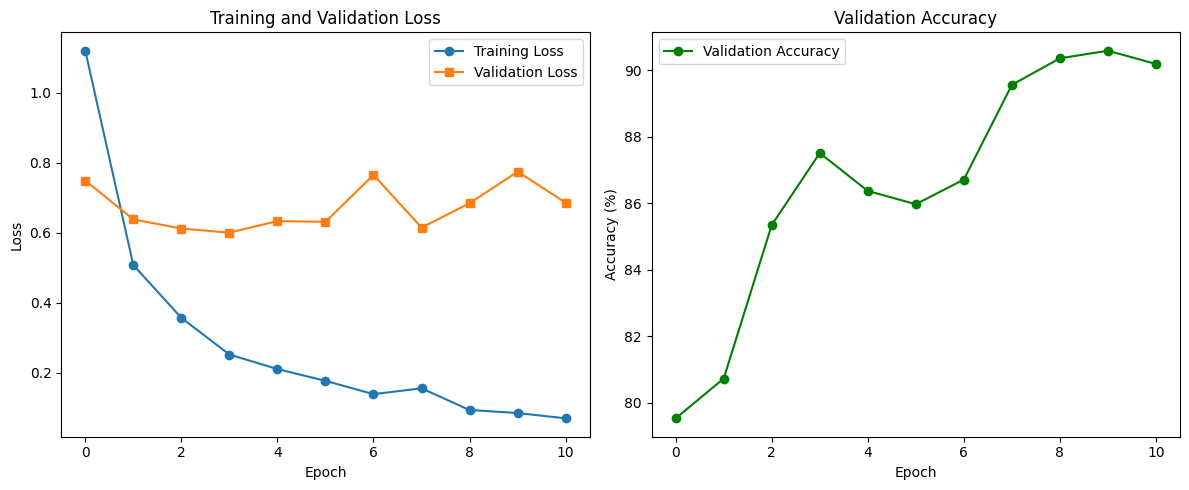

In [43]:
print("\nStarting Model Training (Q3.1)")

# ---- Adjust Hyperparameters ----
NUM_EPOCHS = 40
BATCH_SIZE = 32
INITIAL_LR = 1e-4
PATIENCE = 7  # for early stopping

# ---- Update Optimizer (train from scratch → all layers trainable) ----
for param in model.parameters():
    param.requires_grad = True

optimizer = optim.Adam(model.parameters(), lr=INITIAL_LR, weight_decay=1e-4)

# ---- Add Learning Rate Scheduler ----
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

# ---- Weighted Loss for Imbalanced Classes ----
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_df['label_code']),
    y=train_df['label_code']
)
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights)

# ---- Containers for metrics ----
train_losses, val_losses, val_accuracies = [], [], []

best_val_loss = float('inf')
patience_counter = 0
MODEL_SAVE_PATH = os.path.join(PROJECT_FOLDER_PATH, 'resnet18_landcover_best.pth')

for epoch in range(NUM_EPOCHS):
    print(f"\n--- Epoch {epoch+1}/{NUM_EPOCHS} ---")

    # Train
    train_loss = train_epoch(model, train_loader, criterion, optimizer, device)
    train_losses.append(train_loss)
    print(f"Epoch {epoch+1} Training Loss: {train_loss:.4f}")

    # Validate
    val_loss, val_acc = validate_epoch(model, test_loader, criterion, device)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    print(f"Epoch {epoch+1} Validation Loss: {val_loss:.4f} | Validation Accuracy: {val_acc:.2f}%")

    # Step the scheduler
    scheduler.step()

    # Early Stopping & Best Model Checkpoint
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        torch.save(model.state_dict(), MODEL_SAVE_PATH)
        print(f"Best model saved (val_loss={val_loss:.4f})")
    else:
        patience_counter += 1
        if patience_counter >= PATIENCE:
            print(f"Early stopping triggered at epoch {epoch+1}")
            break

print("\n--- Training Complete ---")
print(f"Best model saved to: {MODEL_SAVE_PATH}")

# ---- Plot the training history ----
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', marker='o')
plt.plot(val_losses, label='Validation Loss', marker='s')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy', color='green', marker='o')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()


In [58]:
# Save Final Training History
print("\nSaving Final Training History")

import numpy as np


# (These lists were created by your training cell)
np.save(os.path.join(PROJECT_FOLDER_PATH, 'train_losses.npy'), np.array(train_losses))
np.save(os.path.join(PROJECT_FOLDER_PATH, 'val_losses.npy'), np.array(val_losses))
np.save(os.path.join(PROJECT_FOLDER_PATH, 'val_accuracies.npy'), np.array(val_accuracies))

print(f"Successfully saved train_losses.npy, val_losses.npy, and val_accuracies.npy to:")
print(PROJECT_FOLDER_PATH)




Saving Final Training History
Successfully saved train_losses.npy, val_losses.npy, and val_accuracies.npy to:
/content/drive/My Drive/Riya_Soni_SelectionTask/


In [ ]:
# 2. Evaluate using a custom F1 score implementation (2 marks)


In [44]:
# Load Best Model and Get All Predictions
print("--- Loading best trained model from Google Drive ---")

# 1. Re-create the model architecture

model = models.resnet18()
in_features = model.fc.in_features


model.fc = nn.Linear(in_features, num_classes)
model = model.to(device)

# 2. Define the path to your saved model
MODEL_SAVE_PATH = os.path.join(PROJECT_FOLDER_PATH, 'resnet18_landcover_best.pth')

# 3. Load the saved weights (the "state_dict")
try:
    # Load the weights into the model architecture
    model.load_state_dict(torch.load(MODEL_SAVE_PATH, map_location=device))
    print("Successfully loaded saved model weights.")
except FileNotFoundError:
    print(f"ERROR: Model file not found at {MODEL_SAVE_PATH}")
    print("Please make sure the training cell ran at least once and saved a model.")

# 4. Set the model to evaluation mode
#    turning off dropout and batch norm updates.
model.eval()
print("Model set to evaluation mode (model.eval()).")


# --- Get All Predictions from Test Set ---
print("\n--- Getting all predictions from the test set... ---")

# We'll store all the true labels and model predictions here
all_labels = []
all_preds = []

# No need to track gradients
with torch.no_grad():
    # (test_loader was defined in your Q3.1 setup cell)
    for images, labels in tqdm(test_loader, desc="Predicting"):
        # Move data to GPU
        images = images.to(device)

        # Get model outputs
        outputs = model(images)

        # Get the prediction (the class with the highest score)
        _, predicted = torch.max(outputs.data, 1)

        # Move data back to CPU and store in lists
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

print("...Done!")
print(f"Collected {len(all_labels)} labels and {len(all_preds)} predictions.")

# Convert to numpy arrays for sklearn and easy analysis
y_true = np.array(all_labels)
y_pred = np.array(all_preds)

# list for labels to be used for plots
class_names_list = list(class_names)

--- Loading best trained model from Google Drive ---
Successfully loaded saved model weights.
Model set to evaluation mode (model.eval()).

--- Getting all predictions from the test set... ---


Predicting:   0%|          | 0/55 [00:00<?, ?it/s]

...Done!
Collected 1754 labels and 1754 predictions.


In [51]:
# Evaluate using a custom F1 score implementation
print("\nCustom F1 Score")

def custom_macro_f1_score(y_true, y_pred, num_classes):
    #Calculates the Macro F1 Scoreand returns the Macro F1 Score (Float)

    f1_scores_per_class = []

    # Iterate over each class (from 0 to num_classes-1)
    for c in range(num_classes):
        # 1. Calculate True Positives (TP), False Positives (FP), False Negatives (FN)
        tp = np.sum((y_pred == c) & (y_true == c))
        fp = np.sum((y_pred == c) & (y_true != c))
        fn = np.sum((y_pred != c) & (y_true == c))

        # 2. Calculate Precision and Recall for this class
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0

        # 3. Calculate F1 Score for this class
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        f1_scores_per_class.append(f1)

    # 4. Calculate the Macro F1 by taking the simple average
    macro_f1 = np.mean(f1_scores_per_class)

    return macro_f1

# --- Run the custom function ---
custom_f1 = custom_macro_f1_score(y_true, y_pred, num_classes)

print(f"Custom Macro F1 Score: {custom_f1:.4f}")

# --- Sanity Check: Compare to sklearn's implementation ---
# This is to prove that the custom function is correct.
from sklearn.metrics import f1_score as sklearn_f1_score
sklearn_f1 = sklearn_f1_score(y_true, y_pred, average='macro')
print(f"Sklearn Macro F1 Score: {sklearn_f1:.4f} (for comparison)")


Custom F1 Score
Custom Macro F1 Score: 0.5900
Sklearn Macro F1 Score: 0.5900 (for comparison)


In [52]:
# 3. Evaluate using torchmetrics.F1Score and compare results (2 marks)


In [53]:
# Evaluate using torchmetrics.F1Score and compare results
print("\nTorchmetrics F1 Score")

from torchmetrics.classification import F1Score

# 1. Convert our numpy arrays back to PyTorch Tensors
y_true_tensor = torch.tensor(y_true)
y_pred_tensor = torch.tensor(y_pred)

# 2. Initialize the F1Score metric
#    The task is 'multiclass' and how to average
torchmetrics_f1 = F1Score(
    task='multiclass',
    num_classes=num_classes,
    average='macro'
)

# 3. Calculate the score
tm_f1 = torchmetrics_f1(y_pred_tensor, y_true_tensor)

print(f"Torchmetrics Macro F1 Score: {tm_f1.item():.4f}")

# --- Comparison ---
print("\nComparison (2 vs 3)")
print(f"Custom F1 Score:     {custom_f1:.4f}")
print(f"Torchmetrics F1 Score: {tm_f1.item():.4f}")

if np.isclose(custom_f1, tm_f1.item()):
    print("The results are identical.")
else:
    print("!! The results are different. Check implementation.")


Torchmetrics F1 Score
Torchmetrics Macro F1 Score: 0.5900

Comparison (2 vs 3)
Custom F1 Score:     0.5900
Torchmetrics F1 Score: 0.5900
The results are identical.


In [54]:
# 4. Show and explain a confusion matrix (2 marks)



Confusion Matrix


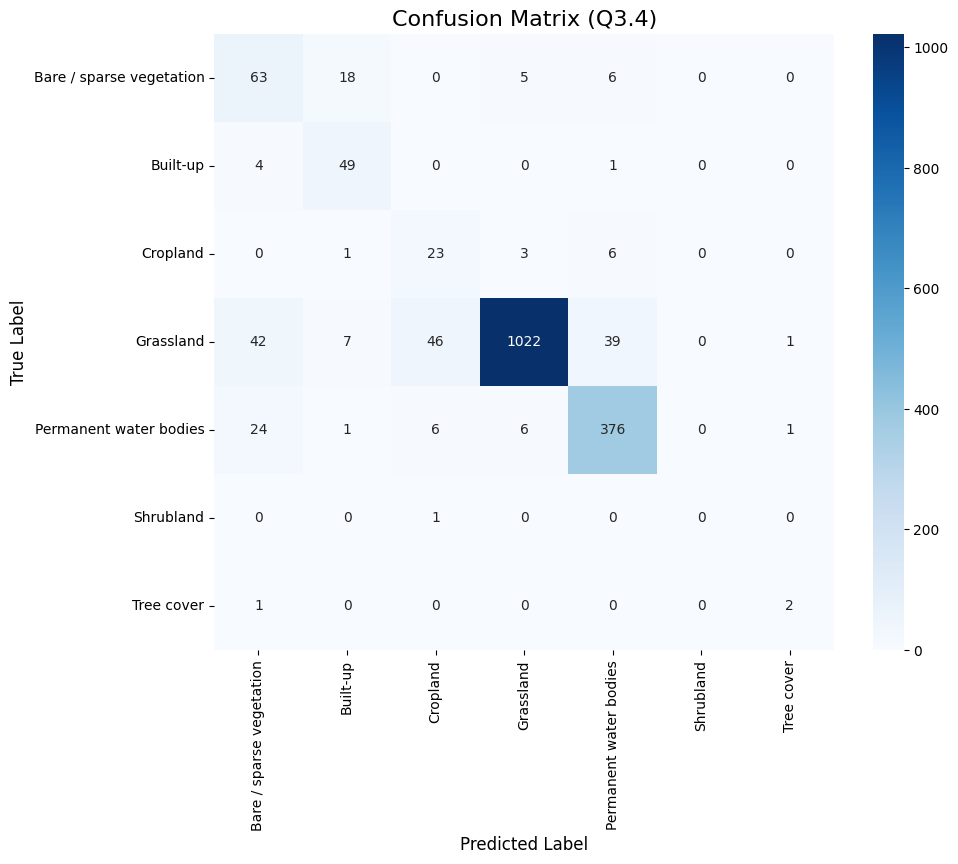

In [55]:
# 4.1 Show and explain a confusion matrix
print("\nConfusion Matrix")

from sklearn.metrics import confusion_matrix
import seaborn as sns

# 1. Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# 2. Convert to a DataFrame for better labeling
cm_df = pd.DataFrame(cm,
                     index=class_names_list,
                     columns=class_names_list)

# 3. Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df,
            annot=True,     # Show the numbers in the cells
            fmt='d',        # Format as integers
            cmap='Blues')   # Color scheme

plt.title('Confusion Matrix (Q3.4)', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

#### 4.2: Explanation of the Confusion Matrix

The confusion matrix above illustrates how well the trained ResNet18 model classified the 7 land cover classes. Each row represents the true labels, and each column represents the predicted labels. The diagonal cells indicate correctly classified samples, while the off-diagonal cells show misclassifications.

* **Overall pattern:** The model demonstrates strong performance, with most samples lying along the diagonal — indicating high true positive counts, especially for **Grassland** and **Permanent water bodies**.

* **High-performing classes:** **Grassland** achieved the highest accuracy (1022 correct predictions), following is the **Permanent water bodies** also performed well (376 correct).

* **Moderate performance:** **Bare/Sparse vegetation** (63 correct) and **Built-up** (49 correct) show reasonable accuracy but have minor confusion between each other, possibly due to similar reflectance patterns or mixed pixels at urban edges. **Cropland** (23 correct) achieved moderate accuracy with some misclassification into **Grassland** (3 misclassified) and **Permanent water bodies** (6 misclassified), likely due to similar seasonal textures or greenness levels (e.g., green vegetation in both cropland and grassland) and seasonal moisture patterns that cause cropland to resemble water in certain bands.

* **Low-frequency classes:** **Shrubland** and **Tree cover** have few samples, leading to limited training examples and higher misclassification rates. Their sparsity affected the model’s ability to learn distinctive features.

The model performs well with dominant, easily separable classes but shows confusion where land cover types share similar spectral characteristics or when training samples are limited.

In [56]:
# 5. Plot 5 correct and 5 incorrect predictions with images and labels (1 mark)


Plotting Predictions


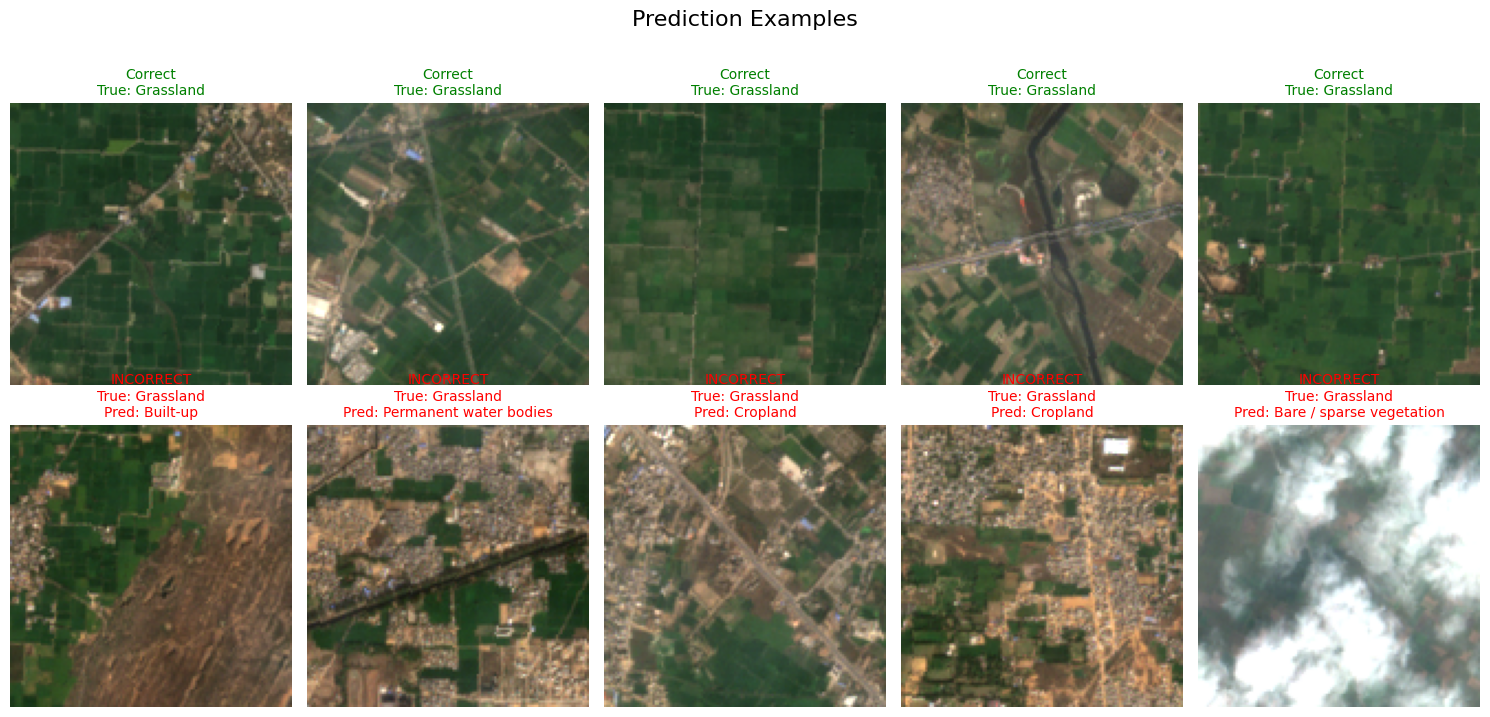

In [57]:
# Plot 5 correct and 5 incorrect predictions
print("\nPlotting Predictions")

from PIL import Image

# 1. Find the indices of correct and incorrect predictions
correct_indices = np.where(y_pred == y_true)[0]
incorrect_indices = np.where(y_pred != y_true)[0]

# 2. Get 5 random samples from each list
correct_samples_idx = np.random.choice(correct_indices, 5, replace=False)
incorrect_samples_idx = np.random.choice(incorrect_indices, 5, replace=False)

# 3. Helper function to plot one image
def plot_prediction(ax, sample_index):
    # Get the image path from the test dataframe
    img_path = test_df.iloc[sample_index]['filepath']

    # Open the image (PIL can open these 3-channel TIFs)
    with Image.open(img_path) as img:
        img_arr = np.array(img)

    # Get the true and predicted labels
    true_label_idx = y_true[sample_index]
    pred_label_idx = y_pred[sample_index]

    # Get the human-readable names
    true_name = index_to_label_name[true_label_idx]
    pred_name = index_to_label_name[pred_label_idx]

    # Plot the image
    ax.imshow(img_arr)
    ax.axis('off')

    # Set the title
    if true_label_idx == pred_label_idx:
        color = 'green'
        title = f"Correct\nTrue: {true_name}"
    else:
        color = 'red'
        title = f"INCORRECT\nTrue: {true_name}\nPred: {pred_name}"

    ax.set_title(title, color=color, fontsize=10)

# --- 4. Create the final 2x5 plot ---

# Plot 5 correct predictions
fig, axes = plt.subplots(2, 5, figsize=(15, 7))
fig.suptitle('Prediction Examples', fontsize=16, y=1.03)

for i, sample_idx in enumerate(correct_samples_idx):
    plot_prediction(axes[0, i], sample_idx)

# Plot 5 incorrect predictions
for i, sample_idx in enumerate(incorrect_samples_idx):
    plot_prediction(axes[1, i], sample_idx)

plt.tight_layout()
plt.show()

# Plotting Diverse Prediction Patterns

As the above cell only showed patches with True label as: **Grassland**

In [2]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 44.1 MB/s eta 0:00:00


In [4]:
print("--- Initializing all libraries and data paths... ---")

# --- 1. Imports ---
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T
import torchvision.models as models
import rasterio
import pandas as pd
import numpy as np
import os
import glob
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import drive

# --- 2. Mount Drive and Set Paths ---
try:
    drive.mount('/content/drive', force_remount=True)
except:
    drive.mount('/content/drive')

DRIVE_BASE_PATH = '/content/drive/My Drive/'
PROJECT_FOLDER_PATH = os.path.join(DRIVE_BASE_PATH, 'Riya_Soni_SelectionTask/')
RECRUITER_DATA_PATH = os.path.join(DRIVE_BASE_PATH, 'Drive - selection_task')
CSV_PATH = os.path.join(PROJECT_FOLDER_PATH, "labeled_dataset.csv")
TRAIN_CSV_PATH = os.path.join(PROJECT_FOLDER_PATH, "train_dataset.csv")
TEST_CSV_PATH = os.path.join(PROJECT_FOLDER_PATH, "test_dataset.csv")
MODEL_SAVE_PATH = os.path.join(PROJECT_FOLDER_PATH, 'resnet18_landcover_best.pth')
LAND_COVER_REPROJECTED_PATH = os.path.join(RECRUITER_DATA_PATH, 'land_cover_32644.tif')

# --- 3. Set Device ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
if str(device) == "cpu":
    print("!! WARNING: GPU IS NOT ENABLED. GO TO RUNTIME > CHANGE RUNTIME TYPE !!")

# --- 4. Load DataFrames ---
try:
    train_df = pd.read_csv(TRAIN_CSV_PATH)
    test_df = pd.read_csv(TEST_CSV_PATH)
    full_dataset_df = pd.read_csv(CSV_PATH)
    print("Successfully loaded CSVs.")
except FileNotFoundError:
    print("ERROR: Could not find CSV files. Please re-run Q2.")

# --- 5. Create Label Maps ---
class_names = sorted(full_dataset_df['label_name'].unique())
num_classes = len(class_names)
class_codes = sorted(full_dataset_df['label_code'].unique())
label_code_to_index = {code: i for i, code in enumerate(class_codes)}
index_to_label_name = {i: name for i, name in enumerate(class_names)}
print(f"Found {num_classes} classes: {class_names}")

# --- 6. Define the LandCoverDataset Class ---
class LandCoverDataset(Dataset):
    def __init__(self, dataframe, label_map, transform=None):
        self.dataframe = dataframe
        self.label_map = label_map
        self.transform = transform
    def __len__(self):
        return len(self.dataframe)
    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]
        img_path = row['filepath']
        label_code = row['label_code']
        with rasterio.open(img_path) as src:
            img_numpy = src.read()


        # Handle images that are not 128x128 (e.g., edge tiles)
        c, h, w = img_numpy.shape
        if h < 128 or w < 128:
            # Create a new 3x128x128 tensor filled with zeros
            padded_img = np.zeros((3, 128, 128), dtype=np.uint8)
            # Copy the (smaller) image into the top-left corner
            padded_img[:, :h, :w] = img_numpy
            img_numpy = padded_img # Now 3x128x128

        img_tensor = torch.tensor(img_numpy, dtype=torch.float32) / 255.0
        if self.transform:
            img_tensor = self.transform(img_tensor)
        label = self.label_map[label_code]
        return img_tensor, label
print("LandCoverDataset class defined (with padding fix).")

# --- 7. Define Transforms and Test Loader ---
imagenet_mean = [0.485, 0.456, 0.406]
imagenet_std = [0.229, 0.224, 0.225]
val_transform = T.Compose([
    T.Normalize(mean=imagenet_mean, std=imagenet_std)
])
test_dataset = LandCoverDataset(
    dataframe=test_df,
    label_map=label_code_to_index,
    transform=val_transform
)
test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=32,
    shuffle=False,
    num_workers=0
)
print("Test DataLoader created (num_workers=0).")

# --- 8. Load the Saved Model ---
model = models.resnet18()
in_features = model.fc.in_features
model.fc = nn.Linear(in_features, num_classes)
model = model.to(device)
try:
    model.load_state_dict(torch.load(MODEL_SAVE_PATH, map_location=device))
    print("Successfully loaded saved model weights.")
except FileNotFoundError:
    print(f"ERROR: Model file not found at {MODEL_SAVE_PATH}")
model.eval()
print("Model set to evaluation mode (model.eval()).")

# --- 9. Get All Predictions ---
print("\n--- Getting all predictions from the test set... ---")
all_labels = []
all_preds = []
with torch.no_grad():
    for images, labels in tqdm(test_loader, desc="Predicting"):
        images = images.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

print("...Done!")
y_true = np.array(all_labels)
y_pred = np.array(all_preds)
print(f"Collected {len(y_true)} labels and predictions. You are ready to evaluate.")

--- Initializing all libraries and data paths... ---
Mounted at /content/drive
Using device: cpu
!! WARNING: GPU IS NOT ENABLED. GO TO RUNTIME > CHANGE RUNTIME TYPE !!
Successfully loaded CSVs.
Found 7 classes: ['Bare / sparse vegetation', 'Built-up', 'Cropland', 'Grassland', 'Permanent water bodies', 'Shrubland', 'Tree cover']
LandCoverDataset class defined (with padding fix).
Test DataLoader created (num_workers=0).
Successfully loaded saved model weights.
Model set to evaluation mode (model.eval()).

--- Getting all predictions from the test set... ---


Predicting:   0%|          | 0/55 [00:00<?, ?it/s]

...Done!
Collected 1754 labels and predictions. You are ready to evaluate.



--- Plotting Diverse Predictions ---
Plotting 5 diverse correct samples...
Plotting 5 diverse incorrect samples...


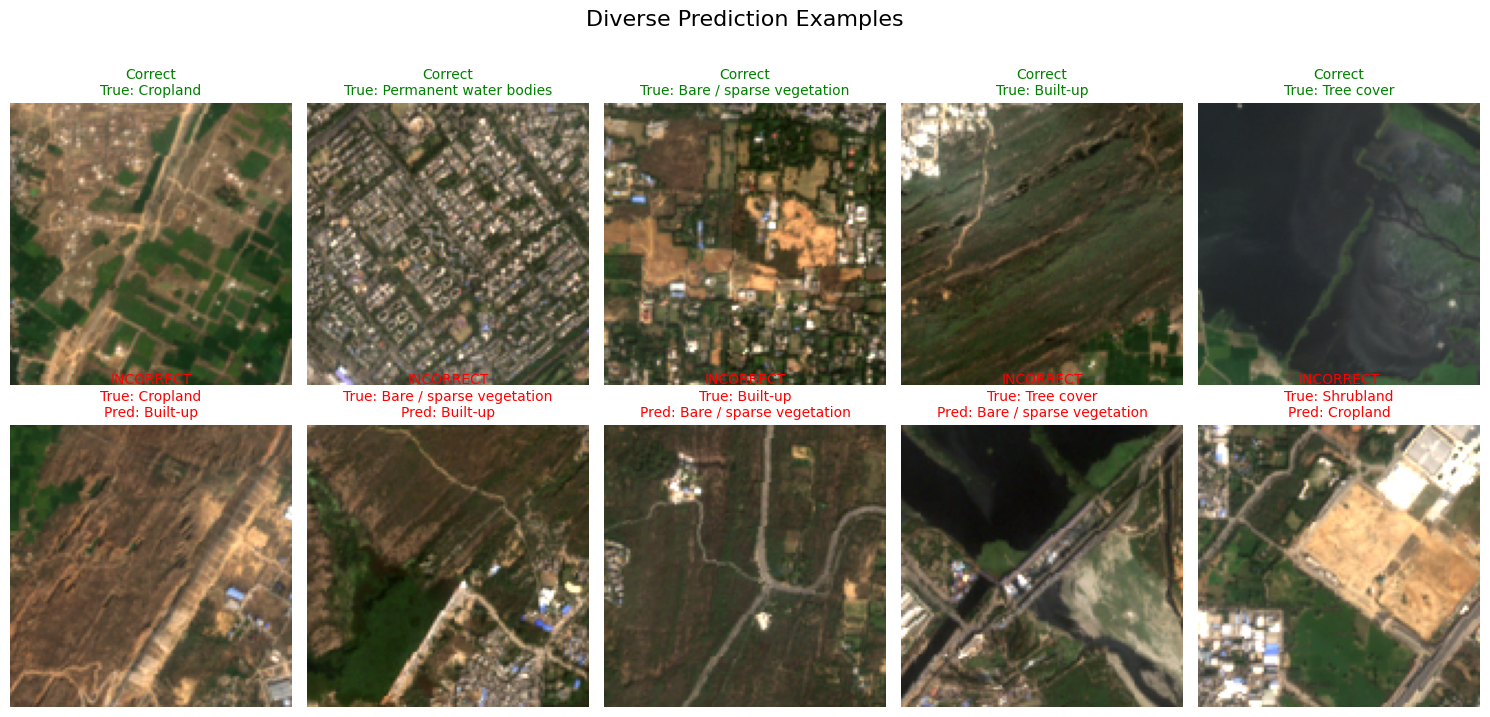

In [7]:
## 5: Plot 5 correct and 5 incorrect predictions (Diverse)
print("\n--- Plotting Diverse Predictions ---")

# 1. Find the indices of correct and incorrect predictions
correct_indices = np.where(y_pred == y_true)[0]
incorrect_indices = np.where(y_pred != y_true)[0]

# --- 2. Get DIVERSE samples ---
# group indices by their TRUE class
correct_samples_by_class = {}
incorrect_samples_by_class = {}

for idx in correct_indices:
    label = y_true[idx] # Get the true label (e.g., 0, 1, 2...)
    if label not in correct_samples_by_class:
        correct_samples_by_class[label] = []
    correct_samples_by_class[label].append(idx)

for idx in incorrect_indices:
    label = y_true[idx]
    if label not in incorrect_samples_by_class:
        incorrect_samples_by_class[label] = []
    incorrect_samples_by_class[label].append(idx)

# --- 3. Pick 5 diverse samples ---
diverse_correct_indices = []
for label_class in correct_samples_by_class.keys():
    # Pick one random sample from this class
    sample = np.random.choice(correct_samples_by_class[label_class])
    diverse_correct_indices.append(sample)

diverse_incorrect_indices = []
for label_class in incorrect_samples_by_class.keys():
    # Pick one random sample from this class
    sample = np.random.choice(incorrect_samples_by_class[label_class])
    diverse_incorrect_indices.append(sample)

# Shuffle the lists and take the first 5 (in case we have > 5 classes)
np.random.shuffle(diverse_correct_indices)
np.random.shuffle(diverse_incorrect_indices)
correct_samples_idx = diverse_correct_indices[:5]
incorrect_samples_idx = diverse_incorrect_indices[:5]

# (This handles the rare case where there are < 5 incorrect classes)
if len(incorrect_samples_idx) < 5:
    extra_samples = np.random.choice(incorrect_indices, 5 - len(incorrect_samples_idx), replace=False)
    incorrect_samples_idx.extend(extra_samples)


# 4. function to plot one image
def plot_prediction(ax, sample_index):
    img_path = test_df.iloc[sample_index]['filepath']
    with Image.open(img_path) as img:
        img_arr = np.array(img)

    true_label_idx = y_true[sample_index]
    pred_label_idx = y_pred[sample_index]

    true_name = index_to_label_name[true_label_idx]
    pred_name = index_to_label_name[pred_label_idx]

    ax.imshow(img_arr)
    ax.axis('off')

    if true_label_idx == pred_label_idx:
        color = 'green'
        title = f"Correct\nTrue: {true_name}"
    else:
        color = 'red'
        title = f"INCORRECT\nTrue: {true_name}\nPred: {pred_name}"

    ax.set_title(title, color=color, fontsize=10)

# --- 5. Create the final 2x5 plot ---
fig, axes = plt.subplots(2, 5, figsize=(15, 7))
fig.suptitle('Diverse Prediction Examples', fontsize=16, y=1.03)

print(f"Plotting 5 diverse correct samples...")
for i, sample_idx in enumerate(correct_samples_idx):
    plot_prediction(axes[0, i], sample_idx)

print(f"Plotting 5 diverse incorrect samples...")
for i, sample_idx in enumerate(incorrect_samples_idx):
    plot_prediction(axes[1, i], sample_idx)

plt.tight_layout()
plt.show()